In [1]:
# 1

########## 20 March 2019 - Alec S. Hirschauer ##########
# Now that the catalogs of stellar types from the various CMDs
# is complete, and a master catalog has been created which joins
# all of this information together,
# our task now is to decide what selection criteria must be set
# to determine our levels of confidence in a given object.
#
# These criteria are based on the frequency of a given object's
# appearance in the color-cut regions in each of the three CMDs.
#
# In addition, YSOs will be selected based on their proximity to
# the star-forming regions of NGC 6822.
#
# The levels of confidence are going to be relatively conservative,
# in that we'll specify objects as "reliable" and "candidate".

In [2]:
# 2

# First thing needed is to import the relevant Python libraries.

import numpy as np
import pandas as pd
from astropy.table import Table, Column, MaskedColumn
from astropy.io import ascii
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.coordinates import SkyCoord, Angle
from astropy import units as u

In [3]:
# 3

# The next step is to upload the master source catalog, which includes
# columns designating in which region an object appears an in which CMD.
#
# The regions are as follows:
# [1] foreground/main-sequence stars
# [2] O-rich AGBs and RSGs
# [3] dusty O-rich AGBs (only CMDs 1 & 2)
# [4] C-rich AGBs
# [5] dust-enshrouded objects and YSOs
# [6] background galaxies (only CMD 3)

MASTERCAT = pd.read_csv('MASTERCATALOG_ahirschauer.csv')

In [4]:
# 4

# selection criteria for "RELIABLE" objects (type = 1)

In [5]:
# 5

# Make a function to deterine if a point source is within a cirlce

def in_circle(center_x, center_y, radius, x, y):
    square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
    return square_dist <= radius ** 2

In [6]:
# 6

# Read in the SF regions in NGC 6822
SFregions = ascii.read('/Users/ahirschauer/Documents/Year2/03-2019/NGC6822/SFreg_NGC6822.csv')

# Parse this into coordinates and angle units
ra_decSFR = SkyCoord(SFregions['RA'], SFregions['Dec'], unit=(u.deg, u.deg), frame='fk5')
radSFR = Angle(SFregions['Radius'] * u.arcsec)


13765


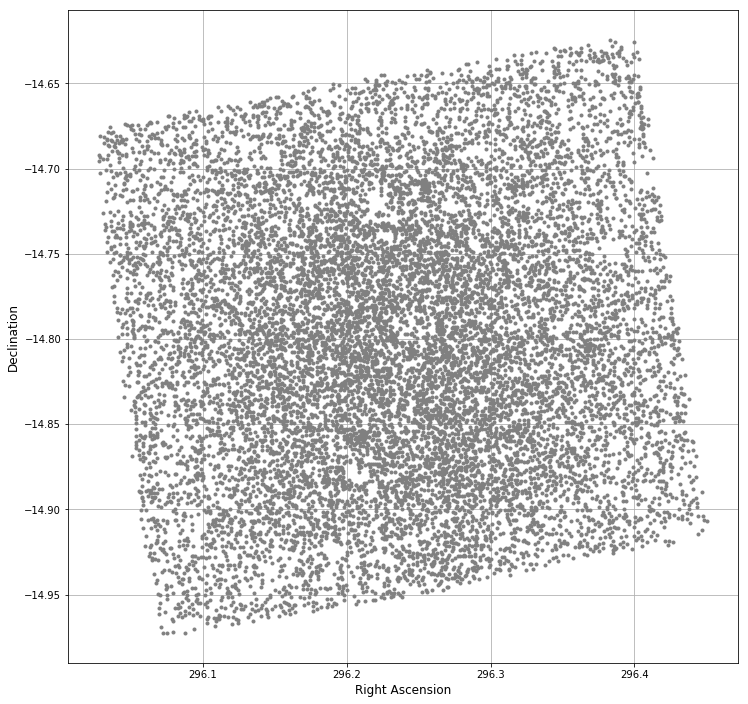

In [7]:
# 7

### background galaxies:
# listed as "null" in CMD1 and CMD2
# (they are too faint to be detected in these filters)
# and listed as "6" in CMD3

background1 = MASTERCAT[(MASTERCAT.CMD1region < 2) & (MASTERCAT.CMD2region < 2) & (MASTERCAT.CMD3region == 6)]

print(len(background1))

plt.figure(figsize=(12,12))
plt.plot(background1.RA, background1.Dec, '.', color='gray')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


458


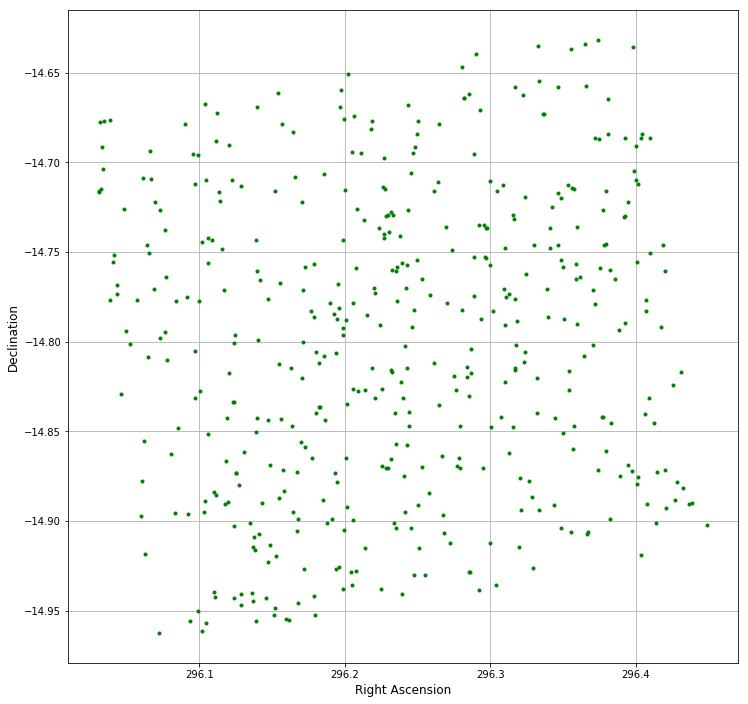

In [8]:
# 8

### foreground/main-sequence stars:
# listed as "1" or "null" in CMD1 and CMD2 or "1" in CMD3

foreground1 = MASTERCAT[((MASTERCAT.CMD1region == 1) | (MASTERCAT.CMD1region < 0)) & ((MASTERCAT.CMD2region == 1) | (MASTERCAT.CMD2region < 0)) & (MASTERCAT.CMD3region == 1)]

print(len(foreground1))

plt.figure(figsize=(12,12))
plt.plot(foreground1.RA, foreground1.Dec, '.', color='green')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


4955
2603
1221
1131
1095


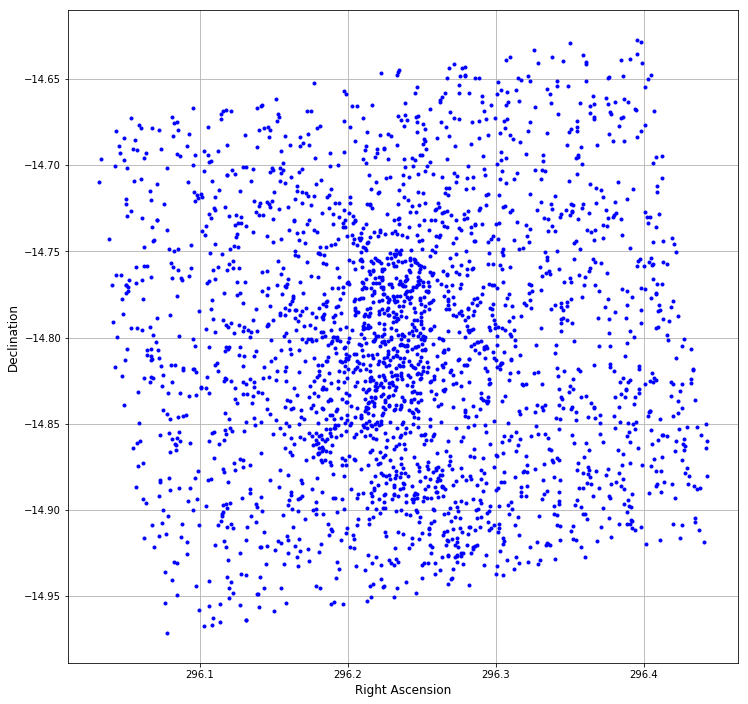

In [9]:
# 9

### O-rich AGBs and RSGs + dusty O-rich AGBs:
# listed as "2" or "3" in two or more CMDs
# NB: if marked in only two CMDs, what's its other region value?

Orich1ALL = MASTERCAT[((MASTERCAT.CMD1region == 2) | (MASTERCAT.CMD1region == 3)) & ((MASTERCAT.CMD2region == 2) | (MASTERCAT.CMD2region == 3)) & (MASTERCAT.CMD3region == 2)]
Orich1a = MASTERCAT[((MASTERCAT.CMD1region == 2) | (MASTERCAT.CMD1region == 3)) & ((MASTERCAT.CMD2region == 2) | (MASTERCAT.CMD2region == 3))]
Orich1b = MASTERCAT[((MASTERCAT.CMD1region == 2) | (MASTERCAT.CMD1region == 3)) & (MASTERCAT.CMD3region == 2)]
Orich1c = MASTERCAT[((MASTERCAT.CMD2region == 2) | (MASTERCAT.CMD2region == 3)) & (MASTERCAT.CMD3region == 2)]

Orich1 = [Orich1a, Orich1b, Orich1c]
Orich1 = pd.concat(Orich1)

print(len(Orich1))
print(len(Orich1a))
print(len(Orich1b))
print(len(Orich1c))
print(len(Orich1ALL))

# Actually, we're going to remove the selection criteria involving CMD3,
# so "Orich1a" will be sufficient for us now.

plt.figure(figsize=(12,12))

#plt.plot(Orich1ALL.RA, Orich1ALL.Dec, '.', color='cyan')
plt.plot(Orich1a.RA, Orich1a.Dec, '.', color='blue')
#plt.plot(Orich1b.RA, Orich1b.Dec, '.', color='blue')
#plt.plot(Orich1c.RA, Orich1c.Dec, '.', color='blue')
#plt.plot(Orich1.RA, Orich1.Dec, '.', color='blue')

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


963
559
220
184
182


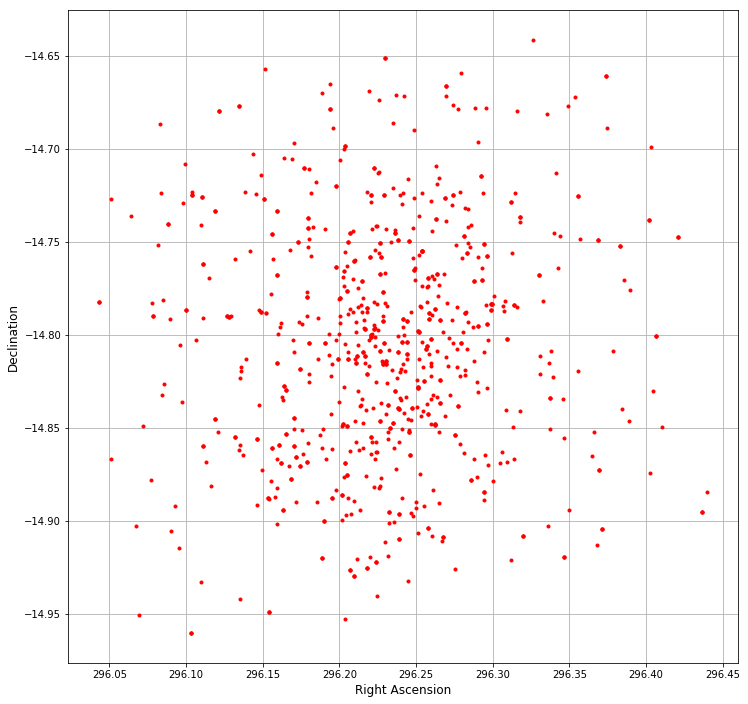

In [10]:
# 10

### C-rich AGBs:
# listed as "4" in both of the first two CMDs

Crich1ALL = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 4)]
Crich1a = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 4)]
Crich1b = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD3region == 4)]
Crich1c = MASTERCAT[(MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 4)]

Crich1 = [Crich1a, Crich1b, Crich1c]
Crich1 = pd.concat(Crich1)

print(len(Crich1))
print(len(Crich1a))
print(len(Crich1b))
print(len(Crich1c))
print(len(Crich1ALL))

plt.figure(figsize=(12,12))

#plt.plot(Crich1ALL.RA, Crich1ALL.Dec, '.', color='magenta')
#plt.plot(Crich1a.RA, Crich1a.Dec, '.', color='red')
#plt.plot(Crich1b.RA, Crich1b.Dec, '.', color='blue')
#plt.plot(Crich1c.RA, Crich1c.Dec, '.', color='green')
plt.plot(Crich1.RA, Crich1.Dec, '.', color='red')

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()

875


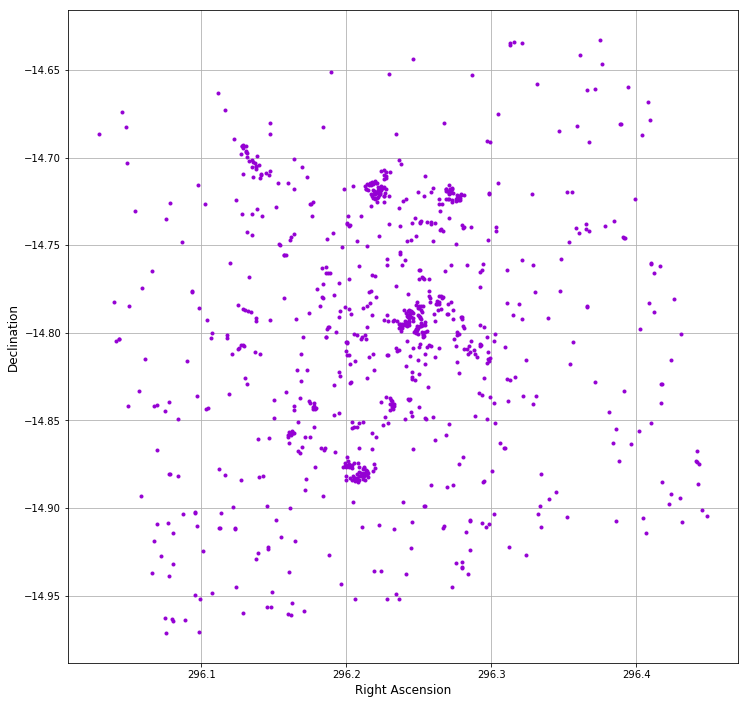

In [11]:
# 11

### dust-enshrouded objects and YSOs:
# listed as "5" in CMD3
# and must be matched spatially to a star-forming region

YSO1a = MASTERCAT[(MASTERCAT.CMD3region == 5) | (MASTERCAT.CMD2region == 5) | (MASTERCAT.CMD1region == 5)]
# plus, in the regions as defined by the spatial distribution criteria plotted below

print(len(YSO1a))

plt.figure(figsize=(12,12))
plt.plot(YSO1a.RA, YSO1a.Dec, '.', color='darkviolet')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


In [12]:
# 12

# Find which SF region if any the stars are in

inregion0_idx = in_circle(ra_decSFR[0].ra.deg, ra_decSFR[0].dec.deg, radSFR[0].deg, YSO1a.RA, YSO1a.Dec)
inregion1_idx = in_circle(ra_decSFR[1].ra.deg, ra_decSFR[1].dec.deg, radSFR[1].deg, YSO1a.RA, YSO1a.Dec)
inregion2_idx = in_circle(ra_decSFR[2].ra.deg, ra_decSFR[2].dec.deg, radSFR[2].deg, YSO1a.RA, YSO1a.Dec)
inregion3_idx = in_circle(ra_decSFR[3].ra.deg, ra_decSFR[3].dec.deg, radSFR[3].deg, YSO1a.RA, YSO1a.Dec)
inregion4_idx = in_circle(ra_decSFR[4].ra.deg, ra_decSFR[4].dec.deg, radSFR[4].deg, YSO1a.RA, YSO1a.Dec)
inregion5_idx = in_circle(ra_decSFR[5].ra.deg, ra_decSFR[5].dec.deg, radSFR[5].deg, YSO1a.RA, YSO1a.Dec)
inregion6_idx = in_circle(ra_decSFR[6].ra.deg, ra_decSFR[6].dec.deg, radSFR[6].deg, YSO1a.RA, YSO1a.Dec)
inregion7_idx = in_circle(ra_decSFR[7].ra.deg, ra_decSFR[7].dec.deg, radSFR[7].deg, YSO1a.RA, YSO1a.Dec)
inregion8_idx = in_circle(ra_decSFR[8].ra.deg, ra_decSFR[8].dec.deg, radSFR[8].deg, YSO1a.RA, YSO1a.Dec)
inregion9_idx = in_circle(ra_decSFR[9].ra.deg, ra_decSFR[9].dec.deg, radSFR[9].deg, YSO1a.RA, YSO1a.Dec)
inregion10_idx = in_circle(ra_decSFR[10].ra.deg, ra_decSFR[10].dec.deg, radSFR[10].deg, YSO1a.RA, YSO1a.Dec)


In [13]:
# 13

# Now need to combine the idx to find if in a SFR

# Make a master array of if in SFR
inSFR_idx_array = np.array([inregion0_idx, inregion1_idx, inregion2_idx, inregion3_idx, inregion4_idx, inregion5_idx, inregion6_idx, inregion7_idx, inregion8_idx, inregion9_idx, inregion10_idx])
# Make True/False list for the
inSFR_idx = np.empty(len(inSFR_idx_array.T))

# To itterare over columns need to transpose the array
for counter, row in enumerate(inSFR_idx_array.T):
    inSFR_idx[counter] = row.any()

# Now Convert back to an index value for the array
inSFR_idx = np.where(inSFR_idx == 1)



In [14]:
# 14

YSOastropytable = Table.from_pandas(YSO1a)



Text(0, 0.5, 'Declination')

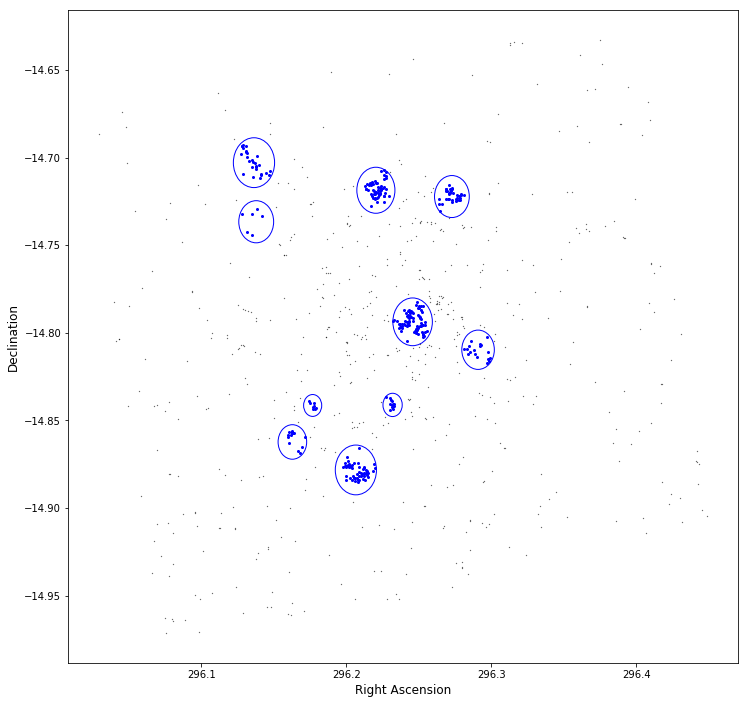

In [15]:
# 15

# Plot the sources in SFR

plt.figure(figsize=(12,12))
plt.plot(YSO1a.RA, YSO1a.Dec, '.', color='black', ms=0.5)


# Plot the SF region circle in the image
circle0 = plt.Circle((ra_decSFR[0].ra.deg, ra_decSFR[0].dec.deg), radSFR[0].deg, color='b', fill=False)
circle1 = plt.Circle((ra_decSFR[1].ra.deg, ra_decSFR[1].dec.deg), radSFR[1].deg, color='b', fill=False)
circle2 = plt.Circle((ra_decSFR[2].ra.deg, ra_decSFR[2].dec.deg), radSFR[2].deg, color='b', fill=False)
circle3 = plt.Circle((ra_decSFR[3].ra.deg, ra_decSFR[3].dec.deg), radSFR[3].deg, color='b', fill=False)
circle4 = plt.Circle((ra_decSFR[4].ra.deg, ra_decSFR[4].dec.deg), radSFR[4].deg, color='b', fill=False)
circle5 = plt.Circle((ra_decSFR[5].ra.deg, ra_decSFR[5].dec.deg), radSFR[5].deg, color='b', fill=False)
circle6 = plt.Circle((ra_decSFR[6].ra.deg, ra_decSFR[6].dec.deg), radSFR[6].deg, color='b', fill=False)
circle7 = plt.Circle((ra_decSFR[7].ra.deg, ra_decSFR[7].dec.deg), radSFR[7].deg, color='b', fill=False)
circle8 = plt.Circle((ra_decSFR[8].ra.deg, ra_decSFR[8].dec.deg), radSFR[8].deg, color='b', fill=False)
circle9 = plt.Circle((ra_decSFR[9].ra.deg, ra_decSFR[9].dec.deg), radSFR[9].deg, color='b', fill=False)
circle10 = plt.Circle((ra_decSFR[10].ra.deg, ra_decSFR[10].dec.deg), radSFR[10].deg, color='b', fill=False)

# Add the circles to the immage
plt.gcf().gca().add_artist(circle0)
plt.gcf().gca().add_artist(circle1)
plt.gcf().gca().add_artist(circle2)
plt.gcf().gca().add_artist(circle3)
plt.gcf().gca().add_artist(circle4)
plt.gcf().gca().add_artist(circle5)
plt.gcf().gca().add_artist(circle6)
plt.gcf().gca().add_artist(circle7)
plt.gcf().gca().add_artist(circle8)
plt.gcf().gca().add_artist(circle9)
plt.gcf().gca().add_artist(circle10)

# Plot the chosen populations
plt.plot(YSOastropytable['RA'][inSFR_idx], YSOastropytable['Dec'][inSFR_idx], '.', color='blue', ms=4)

plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)


In [16]:
# 16

test1 = YSOastropytable[inSFR_idx]

#print(test1)

YSO1 = test1.to_pandas()

In [106]:
# 17

##########

# type "1" = RELIABLE

unclassifiable = MASTERCAT[(MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region < 0)]


background1 = MASTERCAT[(MASTERCAT.CMD1region < 2) & (MASTERCAT.CMD2region < 2) & (MASTERCAT.CMD3region == 6)]


star1a = MASTERCAT[((MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region == 2))]
                #| ((MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region < 0))]
                #| ((MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 1))]

star1b = MASTERCAT[((MASTERCAT.CMD1region == 1) | (MASTERCAT.CMD1region < 0))
                      & ((MASTERCAT.CMD2region == 1) | (MASTERCAT.CMD2region < 0))
                       & (MASTERCAT.CMD3region == 1)]

star1c = MASTERCAT[((MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region < 3))]

star1d = MASTERCAT[((MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 2) & (MASTERCAT.CMD3region == 2))]

star1e = MASTERCAT[(MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 5)]

#print(len(star1e))
#print('')

star1 = [star1a, star1b, star1c, star1d, star1e]
star1concat = pd.concat(star1)
star1concatremoveduplicates = pd.concat([star1concat]).drop_duplicates(keep='first')

Orich1a = MASTERCAT[((MASTERCAT.CMD1region == 2) | (MASTERCAT.CMD1region == 3)) & 
                    ((MASTERCAT.CMD2region == 2) | (MASTERCAT.CMD2region == 3))
                   & (MASTERCAT.CMD3region != 5)]

Crich1ALL = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 4)]
Crich1a = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region != 5)]
Crich1b = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD3region == 4) & (MASTERCAT.CMD2region != 5)]
Crich1c = MASTERCAT[(MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 4) & (MASTERCAT.CMD1region != 5)]
Crich1abc = [Crich1a, Crich1b, Crich1c]
Crich1abcconcat = pd.concat(Crich1abc)
Crich1abcconcatremoveduplicates = pd.concat([Crich1abcconcat]).drop_duplicates(keep='first')

highlyreliable1 = [Orich1a, Crich1abcconcatremoveduplicates, background1, unclassifiable, star1concatremoveduplicates, YSO1] 
highlyreliable2 = pd.concat(highlyreliable1)

highlyreliable2.nunique()

##########

# type "2" = CANDIDATE

star2 = MASTERCAT[(MASTERCAT.CMD1region == 2) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 1)]

Orich2a = MASTERCAT[(MASTERCAT.CMD1region == 2) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 2)]
Orich2b = MASTERCAT[(MASTERCAT.CMD1region == 3) & (MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 2)]



Crich2a = MASTERCAT[(MASTERCAT.CMD1region == 5) & (MASTERCAT.CMD2region == 5) & (MASTERCAT.CMD3region == 4)]
Crich2b = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 5) & (MASTERCAT.CMD3region == 4)]



candidate1 = [star2, Orich2a, Orich2b, Crich2a, Crich2b]
candidate2 = pd.concat(candidate1)

#candidate2.nunique()


##########

unclassed1 = pd.concat([MASTERCAT, highlyreliable2, highlyreliable2]).drop_duplicates(keep=False)
#unclassed2 = pd.concat([unclassed1, candidate2, candidate2]).drop_duplicates(keep=False)
#unclassed3 = pd.concat([unclassed1, unclassed2])
#unclassed3 = unclassed1 + unclassed2

#unclassed2.nunique()
#print(unclassed2.nunique())
#print('')

print(len(MASTERCAT))
print(len(highlyreliable2))
print(len(candidate2))
print(len(highlyreliable2)+len(candidate2))
#print(len(unclassed1))
#print(len(unclassed2))
#print(len(unclassed3))
#print(len(MASTERCAT)-len(unclassed2))

print(30745-28838-255)
print(30745-29093)

Crich1abcconcatremoveduplicates.to_csv('Crich_reliable.csv')
Orich1a.to_csv('Orich_reliable.csv')


30745
28838
255
29093
1652
1652


In [70]:
#highlyreliable2.drop_duplicates(keep='first')

In [71]:
#print(Orich1a)

In [79]:
#from astropy.table import from_pandas

aaa = Table.from_pandas(candidate2)

aaa.show_in_browser(jsviewer=True)

In [21]:
#idx_cagb3 = np.where(aaa['CMD3region'] == 4)

In [22]:
#print(len([idx_cagb3]))

In [23]:
#print(idx_cagb3)

In [24]:
#print(aaa[idx_cagb3])

1907
1915


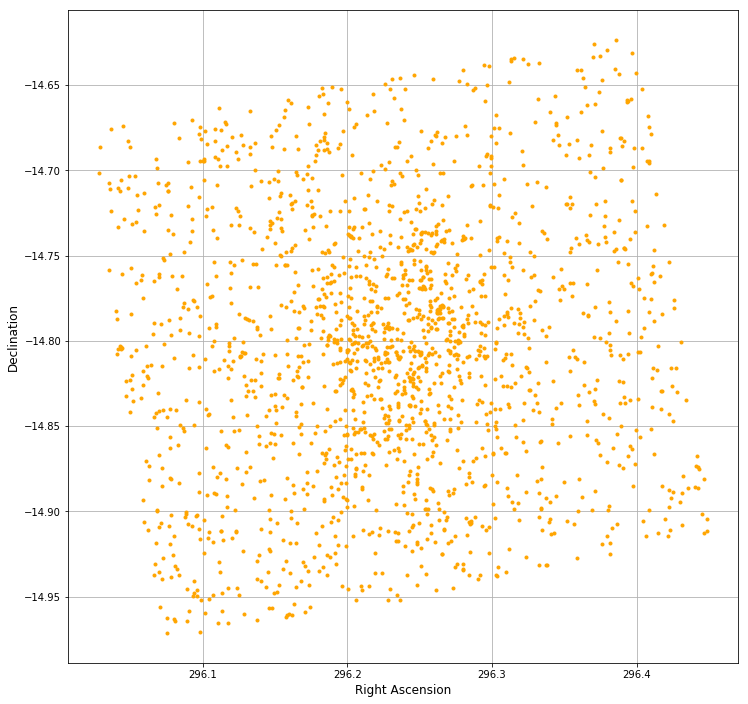

In [25]:
plt.figure(figsize=(12,12))
plt.plot(unclassed1.RA, unclassed1.Dec, '.', color='orange')
#plt.plot(YSO1.RA, YSO1.Dec, '.', color='darkviolet')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

#print(len(unclassed))
print(len(unclassed1))
print(len(unclassed2))


plt.grid(True)
plt.show()
plt.close()




In [26]:
#aaa = Table.from_pandas(YSO1)

#aaa.show_in_browser(jsviewer=True)

In [27]:
star = MASTERCAT[(MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region == 2)]

539


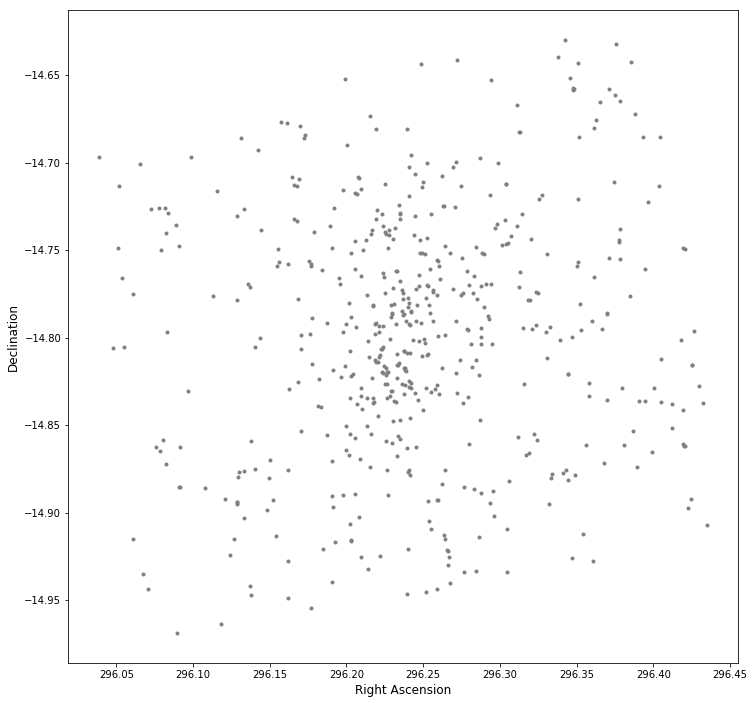

In [28]:
plt.figure(figsize=(12,12))
plt.plot(star.RA, star.Dec, '.', color='gray')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

print(len(star))

In [29]:
unclassifiable = MASTERCAT[(MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region < 0)]

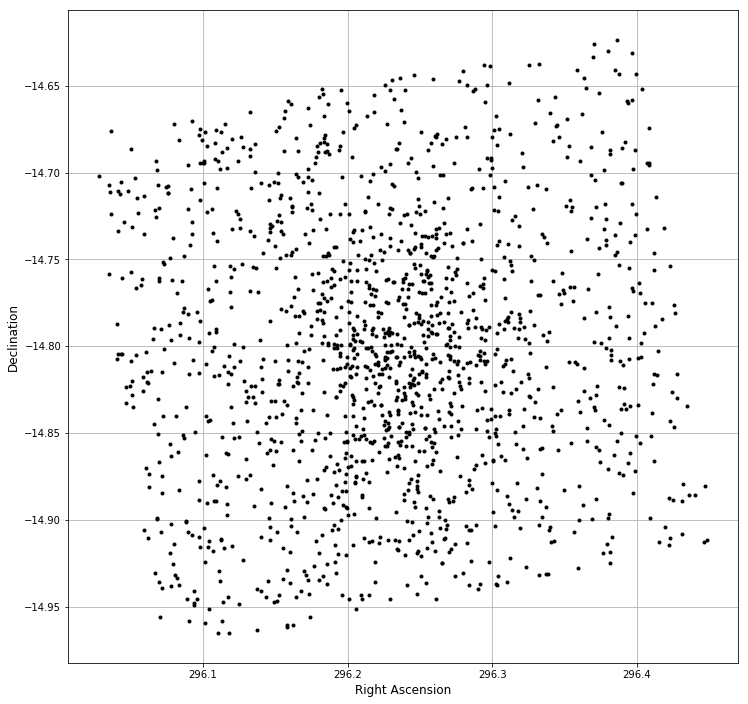

In [30]:
unclassedNOT5 = unclassed1[(unclassed1.CMD3region != 5)]

plt.figure(figsize=(12,12))
plt.plot(unclassedNOT5.RA, unclassedNOT5.Dec, '.', color='black')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()



In [31]:
aaa = Table.from_pandas(unclassedNOT5)

#aaa.show_in_browser(jsviewer=True)

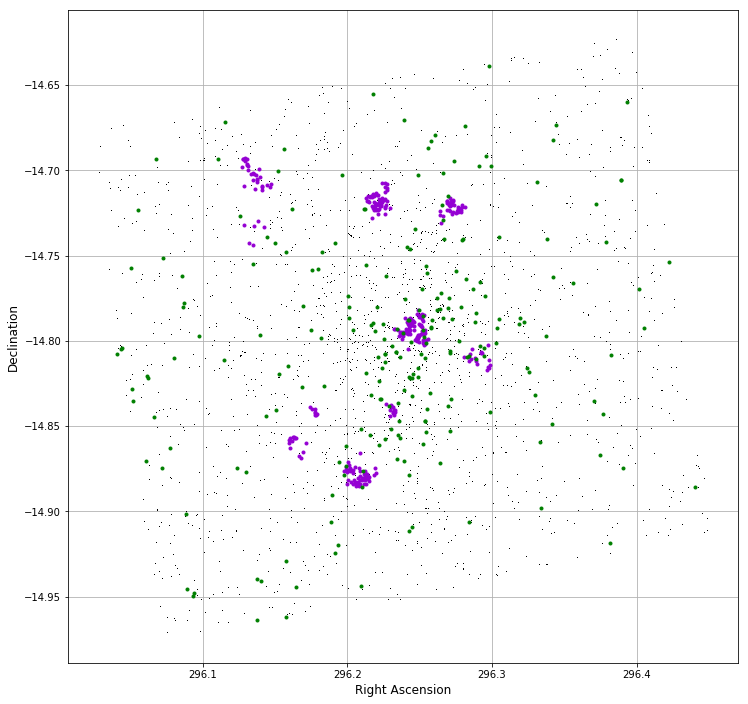

In [32]:
LPC = MASTERCAT[(MASTERCAT.CMD1region < 0) & (MASTERCAT.CMD2region < 0) & (MASTERCAT.CMD3region == 4)]

plt.figure(figsize=(12,12))
plt.plot(unclassed1.RA, unclassed1.Dec, ',', color='black')
plt.plot(YSO1.RA, YSO1.Dec, '.', color='darkviolet')
plt.plot(LPC.RA, LPC.Dec, '.', color='green')
#plt.plot(LPC2.RA, LPC2.Dec, '.', color='cyan')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


344


Text(0, 0.5, 'Declination')

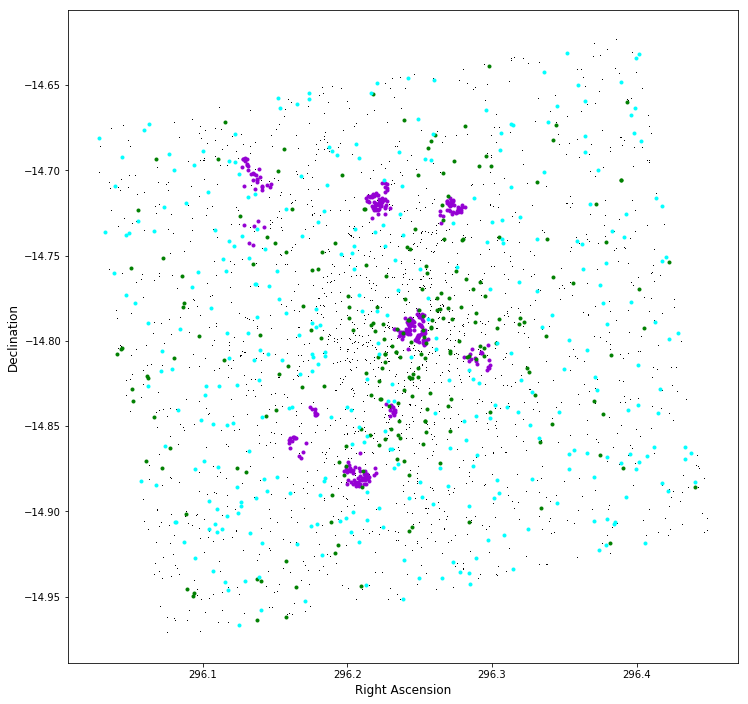

In [33]:
contaminant = MASTERCAT[(MASTERCAT.CMD1region == 1) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 6)]
print(len(contaminant))

plt.figure(figsize=(12,12))
plt.plot(unclassed1.RA, unclassed1.Dec, ',', color='black')
plt.plot(YSO1.RA, YSO1.Dec, '.', color='darkviolet')
plt.plot(LPC.RA, LPC.Dec, '.', color='green')
plt.plot(contaminant.RA, contaminant.Dec, '.', color='cyan')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)


In [34]:
# 4

# selection criteria for "CANDIDATE" objects (type = 2)

20


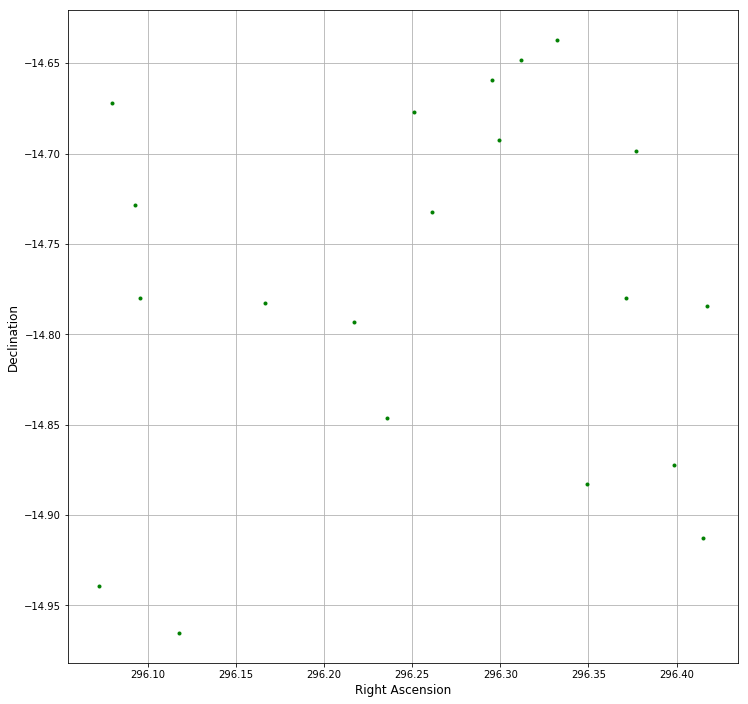

In [35]:
### foreground/main-sequence stars:
# listed as "2" in CMD1, "1" in CMD2, and "1" in CMD3

star2 = MASTERCAT[(MASTERCAT.CMD1region == 2) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 1)]

print(len(star2))

plt.figure(figsize=(12,12))
plt.plot(star2.RA, star2.Dec, '.', color='green')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


65
59


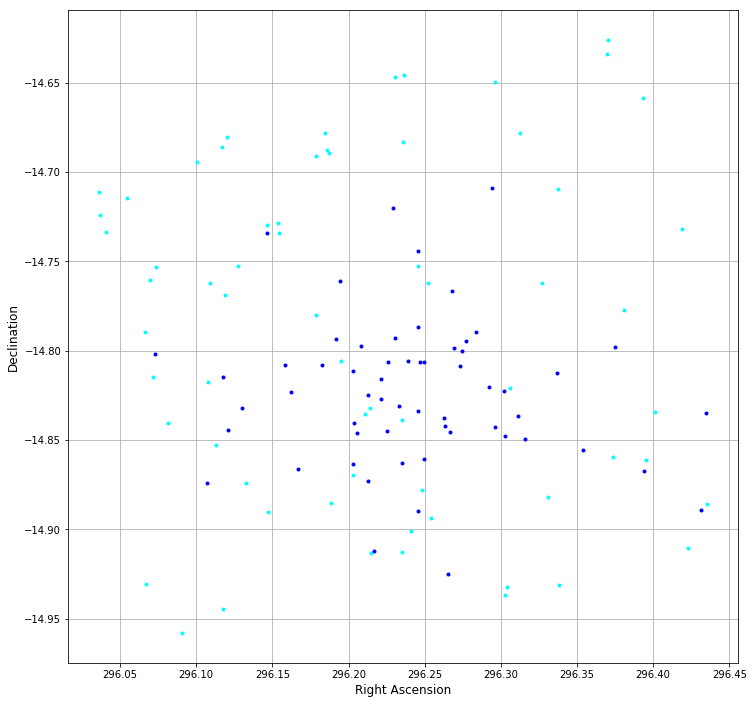

In [36]:
### O-rich AGB stars:
# listed as "2" in CMD1, "1" in CMD2, and "2" in CMD3
# listed as "3" in CMD1, "4" in CMD2, and "2" in CMD3

Orich2a = MASTERCAT[(MASTERCAT.CMD1region == 2) & (MASTERCAT.CMD2region == 1) & (MASTERCAT.CMD3region == 2)]
Orich2b = MASTERCAT[(MASTERCAT.CMD1region == 3) & (MASTERCAT.CMD2region == 4) & (MASTERCAT.CMD3region == 2)]

print(len(Orich2a))
print(len(Orich2b))

plt.figure(figsize=(12,12))
plt.plot(Orich2a.RA, Orich2a.Dec, '.', color='cyan')
plt.plot(Orich2b.RA, Orich2b.Dec, '.', color='blue')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()


84
27


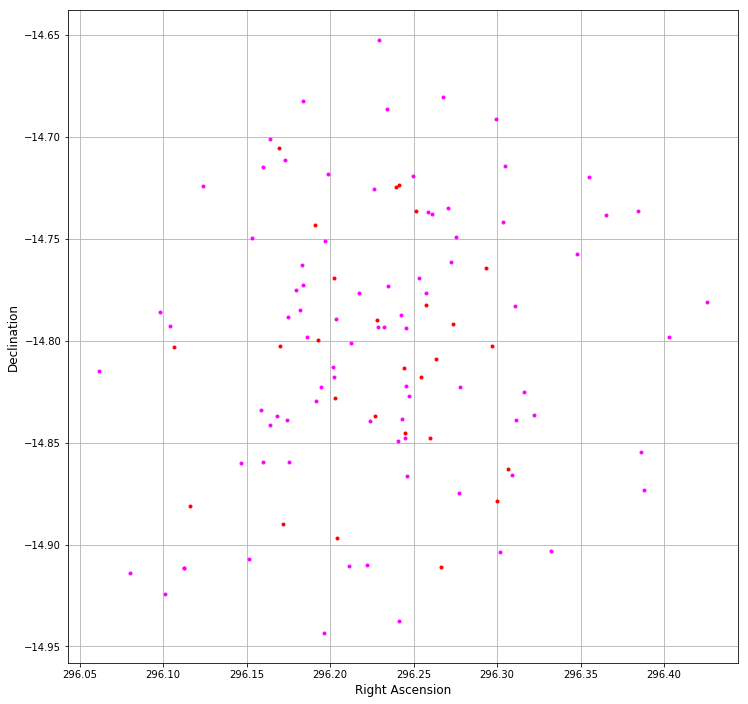

In [37]:
### C-rich AGB stars:
# listed as "5" in CMD1, "5" in CMD2, and "4" in CMD3
# listed as "4" in CMD1, "5" in CMD2, and "4" in CMD3

Crich2a = MASTERCAT[(MASTERCAT.CMD1region == 5) & (MASTERCAT.CMD2region == 5) & (MASTERCAT.CMD3region == 4)]
Crich2b = MASTERCAT[(MASTERCAT.CMD1region == 4) & (MASTERCAT.CMD2region == 5) & (MASTERCAT.CMD3region == 4)]

print(len(Crich2a))
print(len(Crich2b))

plt.figure(figsize=(12,12))
plt.plot(Crich2a.RA, Crich2a.Dec, '.', color='magenta')
plt.plot(Crich2b.RA, Crich2b.Dec, '.', color='red')
plt.xlabel('Right Ascension', size=12)
plt.ylabel('Declination', size=12)

plt.grid(True)
plt.show()
plt.close()
